At a basic level, I think of directed graphs as where the nodes are connected with arrows indicating relationships.

For example, they can be used to represent a social network where not everyone follows everyone else; or a few users are followed by everyone.



In [1]:
import networkx as nx
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#create images folder
current = os.curdir
newfolders = ['images']
for newfolder in newfolders:
    newpath = os.path.join(current,newfolder)
    if not os.path.exists(newpath):
        os.makedirs(newpath)

In [2]:
#create log file
logging.basicConfig(filename="directed-graphs.log",level=20)

The relationships I'd like to model are between the scientific classification of the phylum Chordata (chordates).  I am no biologist, so I have used [Wikipedia](https://en.wikipedia.org/wiki/Chordate) for this information.

Currently, apart from grouping organisms into the traditional hierarchy of Domain-Kingdom-Phylum-Class-Order-Family-Genus-Species, clades are an alternate way to group.  The information in the graph will be oversimplified and drawn from the following dataframe:

In [2]:
taxonomy = [["domain","Eukaryota",1],["kingdom","Animalia",2],["subkingdom","Eumetazoa",3],
            ["clade","ParaHoxozoa",4],["clade","Bilateria",5],["clade","Nephrozoa",6],["superphylum","Deuterostomia",7],
            ["phylum","Chordata",8],["subphylum","Cephalochordata",9],
            ["subphylum","Vertebrata",9],["subphylum","Tunicata",9],["clade","Olfactores",10]]
groupdf = pd.DataFrame(data=taxonomy, columns=["Rank","Name","RankNum"])
groupdf

,Rank,Name,RankNum
0,domain,Eukaryota,1
1,kingdom,Animalia,2
2,subkingdom,Eumetazoa,3
3,clade,ParaHoxozoa,4
4,clade,Bilateria,5
5,clade,Nephrozoa,6
6,superphylum,Deuterostomia,7
7,phylum,Chordata,8
8,subphylum,Cephalochordata,9
9,subphylum,Vertebrata,9


I will put these into a graph where arrows are mutual for the same rank, but go one way between ranks.

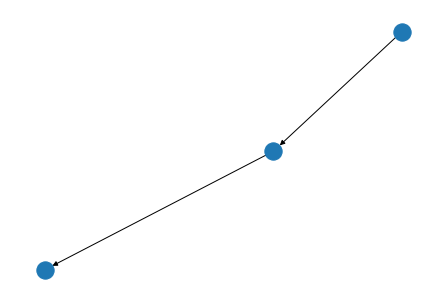

In [3]:
#create graph
dirG = nx.DiGraph()

#add nodes and edges for first three ranks
dirG.add_edges_from([(groupdf.iloc[0,1],groupdf.iloc[1,1]),(groupdf.iloc[1,1],groupdf.iloc[2,1])])

#save drawing to images folder
nx.draw(dirG)
plt.savefig("images/first3.jpg")

In [4]:
#use groupby to separate out ranks
for eachgroup in groupdf.groupby("RankNum"):
    for i, eachrow in enumerate(eachgroup):
        if i!=0:
            rowlen = len(eachrow)
            if rowlen>1:
                comborange = range(rowlen-1)
                pairs = [[rowlen-1,0]]
                for j in comborange:
                    pairs.append([j,j+1])
                #print(pairs)
                for pair in pairs: #loop through those of the same RankNum
                    #add an edge with both directions for each pair
                    dirG.add_edge(eachrow.iloc[pair[0],1], eachrow.iloc[pair[1],1])
                    dirG.add_edge(eachrow.iloc[pair[1],1], eachrow.iloc[pair[0],1])

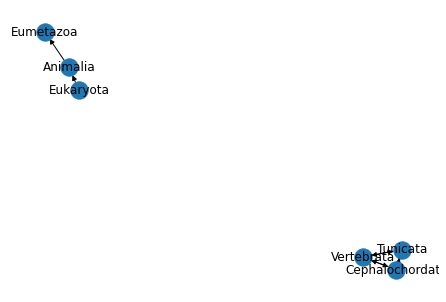

In [5]:
#three subphyla (at the same rank) have been added
nx.draw(dirG, with_labels=True)

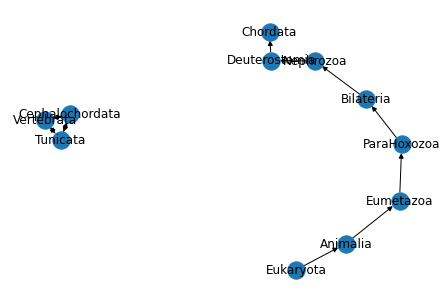

In [5]:
#add edges for relationships between different ranks, starting with RankNum 3->4, ending with 9->10
inds = list(range(2,7)) #based on index values
for i in inds:
    dirG.add_edge(groupdf.iloc[i,1],groupdf.iloc[i+1,1])
nx.draw(dirG, with_labels=True)

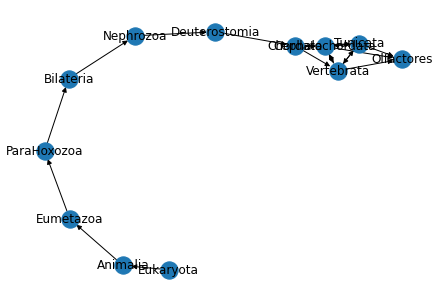

In [6]:
#add edges for RankNum=9 relationships
indsdict = {7:[8,9,10],11:[8,9,10]}
for key, values in indsdict.items():
    if key==7:
        for value in values:
            dirG.add_edge(groupdf.iloc[key,1],groupdf.iloc[value,1])
    elif key==11:
        for value in values:
            dirG.add_edge(groupdf.iloc[value,1],groupdf.iloc[key,1])
nx.draw(dirG,with_labels=True)

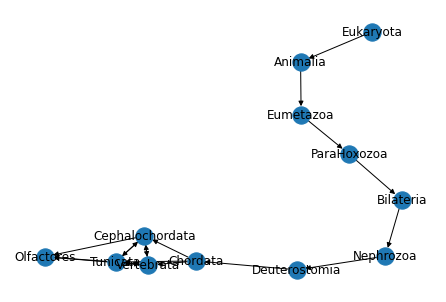

In [42]:
#redrawing for different view
nx.draw(dirG,with_labels=True)

Now comparing graph options for NetworkX `draw`, which relies on `matplotlib`.

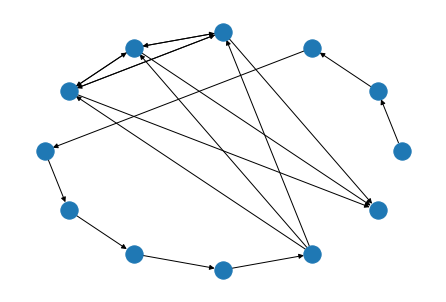

In [44]:
#circular layout
nx.draw_circular(dirG)

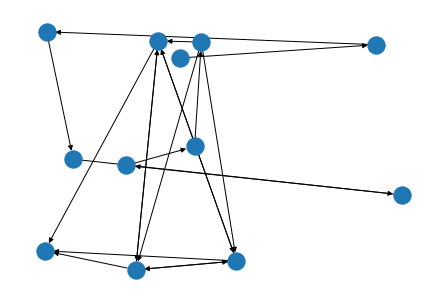

In [9]:
#random square
nx.draw_random(dirG)

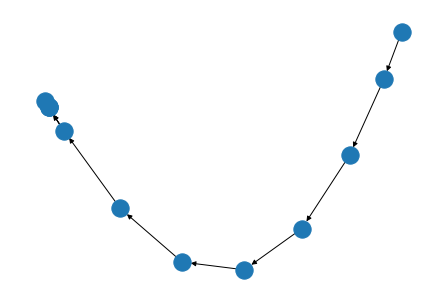

In [46]:
#spectral layout
nx.draw_spectral(dirG)

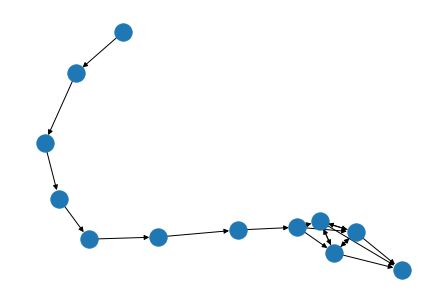

In [47]:
#spring layout (default for .draw)
nx.draw_spring(dirG)

To me, the circular layout is easiest to read (if it had the labels) although the spectral and spring make more sense for this data of ranks since one can follow the path of the hierarchy arrows.

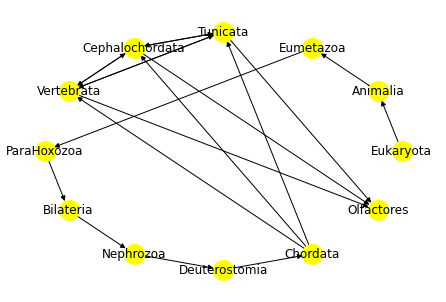

In [49]:
#yellow and slightly larger (default node_size is 300)
nx.draw_circular(dirG,node_size=400,node_color="yellow",with_labels=True)

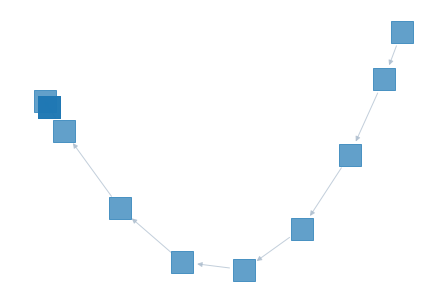

In [58]:
#other options change the shape of the nodes and colors of the edges
#documentation says alpha only affects the transparency of the nodes
nx.draw_spectral(dirG,node_size=450,alpha=0.7,edge_color="#aabbcc",node_shape="s")

## New graph for Header Image
Creating a new graph to become a good visualization to display on social media profiles.

In [58]:
newGraph = nx.Graph()

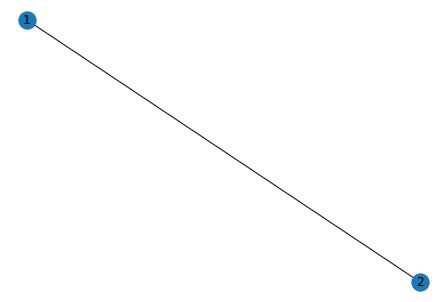

In [40]:
newGraph.add_edge(1,2)
nx.draw(newGraph,with_labels=True)

In [61]:
#generate random 15 pairs of edges from 0 to 29
pairlist = []
for i in range(1,15):
    pair=[np.random.randint(30),np.random.randint(30)]
    pairlist.append(pair)

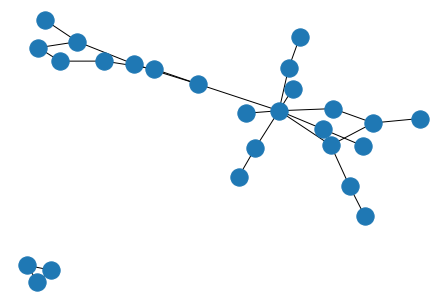

In [63]:
newGraph.add_edges_from(pairlist)
nx.draw(newGraph)

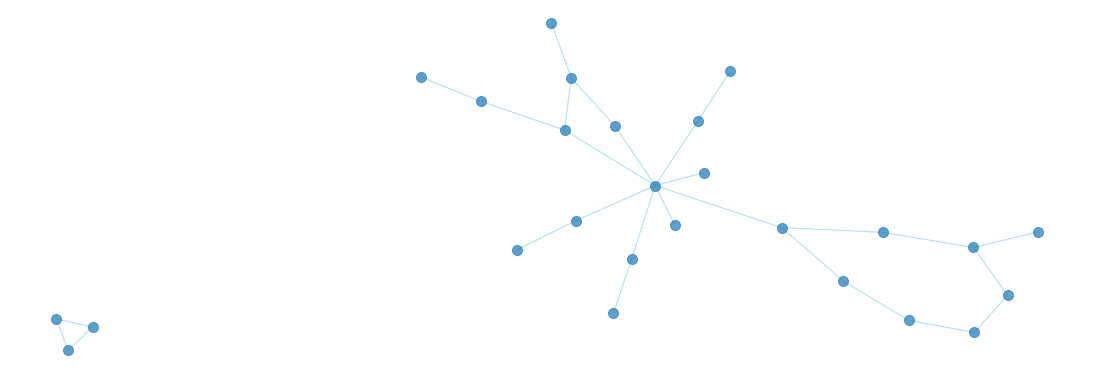

In [70]:
plt.figure(figsize=(15,5))
nx.draw(newGraph,edge_color="skyblue",alpha=0.7,node_size=100)
plt.savefig("images/blue-network.jpg")

#### Customizing keywords
This list was directly copied from the [draw documentation](https://networkx.org/documentation/networkx-1.0/reference/generated/networkx.draw.html#networkx.draw).

* nodelist: list of nodes to be drawn (default=G.nodes())
* edgelist: list of edges to be drawn (default=G.edges())
* node_size: scalar or array of the same length as nodelist (default=300)
* node_color: single color string or numeric/numarray array of floats (default=’r’)
* node_shape: node shape (default=’o’), or ‘so^>v<dph8’ see pylab.scatter (My note: PyLab is not recommended to use anymore; consult [matplotlib.markers](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers) instead)
* alpha: transparency (default=1.0)
* cmap: colormap for mapping intensities (default=None)
* vmin,vmax: min and max for colormap scaling (default=None)
* width: line width of edges (default =1.0)
* edge_color: scalar or array (default=’k’)
* edge_cmap: colormap for edge intensities (default=None)
* edge_vmin,edge_vmax: min and max for colormap edge scaling (default=None)
* style: edge linestyle (default=’solid’) (solid|dashed|dotted,dashdot)
* labels: dictionary keyed by node of text labels (default=None)
* font_size: size for text labels (default=12)
* font_color: (default=’k’)
* font_weight: (default=’normal’)
* font_family: (default=’sans-serif’)
* ax: matplotlib axes instance

## Other graphs
The following plots were created to be saved as JPG files for companion blog posts about the basics of using NetworkX and its parameters for the `draw` methods.

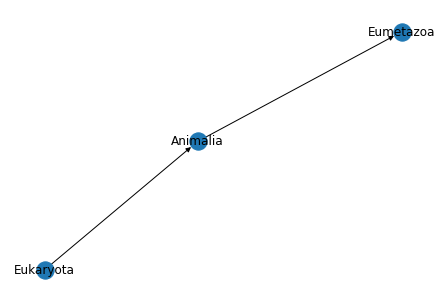

In [7]:
#draw with labels
nx.draw(dirG, with_labels=True)
plt.savefig("images/first3labeled.jpg")

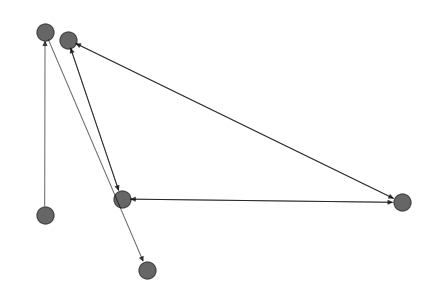

In [12]:
nx.draw_random(dirG, alpha=0.6, node_color="k")
plt.savefig("images/random-gray.jpg")

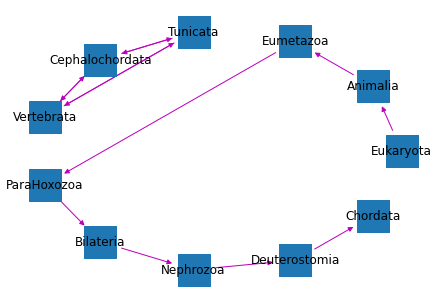

In [26]:
nx.draw_circular(dirG,node_size=1000,edge_color="#bb00bb",node_shape="s", with_labels=True)
plt.savefig("images/circular-squares.jpg")

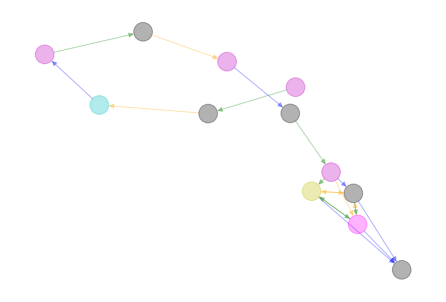

In [33]:
nx.draw(dirG, node_size=350,alpha=.3,edge_color=["green","orange","b"],node_color=["m","k","c","y","magenta","k","m","k","m","k","m","k"])
plt.savefig("images/variouscolors.jpg")

List of colors is according to the order that the nodes were added. This would explain why a node near RankNum 8 is yellow ("y") and a node at RankNum 3 is cyan ("c").

In [23]:
#list nodes
dirG.nodes

NodeView(('Eukaryota', 'Animalia', 'Eumetazoa', 'Tunicata', 'Cephalochordata', 'Vertebrata', 'ParaHoxozoa', 'Bilateria', 'Nephrozoa', 'Deuterostomia', 'Chordata', 'Olfactores'))

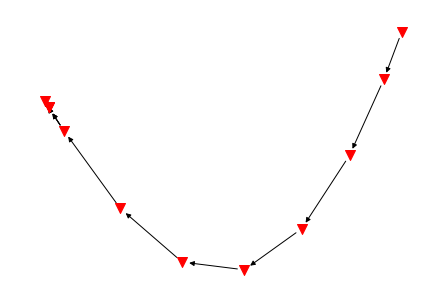

In [17]:
nx.draw_spectral(dirG,node_size=100,node_shape="v",node_color="red")
plt.savefig("images/red-triangles.jpg")

Options for `node_shape` are the same as for the `marker` for `matplotlib.pyplot`, in the documentation [here](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers).  The ones listed in the `networkx.draw` [documentation](https://networkx.org/documentation/networkx-1.0/reference/generated/networkx.draw.html#networkx.draw) are:
* s : square
* o : circles
* ^>v< : equilateral triangles, different orientations
* d : diamond
* p : pentagon
* h : hexagon with vertices at top and bottom
* 8 : octagon

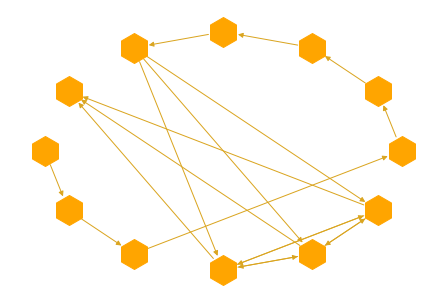

In [23]:
nx.draw_shell(dirG,node_size=900,node_shape="h",edge_color="goldenrod",node_color="orange")
plt.savefig("images/shell-orange.jpg")

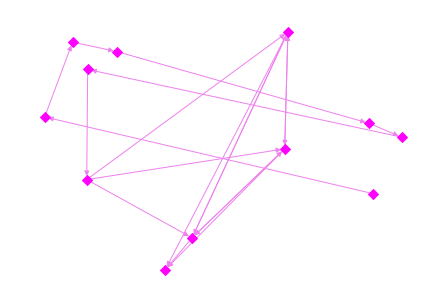

In [24]:
#trying another shape
nx.draw_random(dirG,node_size=50,node_shape="D",edge_color="violet",node_color="magenta")
plt.savefig("images/random-pink.jpg")